# XGBoost
* model_02_MinMax

In [1]:
# 라이브러리 로드
from xgboost import XGBRegressor
from xgboost import plot_importance, plot_tree


from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb ## XGBoost 불러오기
import numpy as np
import joblib

In [2]:
# 데이터 로드
df = pd.read_csv('./MinMax_model02.csv', encoding='utf-8')
df

,일시,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도,남은시간
0,2011-03-04 17:00:00,0.110236,0.234957,0.053571,0.064103,0.698046,0.0,0.0
1,2011-03-04 18:00:00,0.133858,0.234957,0.053571,0.051282,0.710480,0.0,0.0
2,2011-03-04 19:00:00,0.177165,0.234957,0.053571,0.051282,0.719361,0.0,0.0
3,2011-03-04 20:00:00,0.114173,0.234957,0.053571,0.064103,0.726465,0.0,0.0
4,2011-03-04 21:00:00,0.149606,0.234957,0.053571,0.064103,0.735346,0.0,0.0
...,...,...,...,...,...,...,...,...
72644,2018-10-06 06:00:00,0.535433,0.627507,0.517857,0.525641,0.296625,2.0,12.0
72645,2018-10-06 07:00:00,0.570866,0.627507,0.589286,0.602564,0.259325,2.0,11.0
72646,2018-10-06 08:00:00,0.696850,0.664756,0.839286,0.858974,0.206039,2.0,10.0
72647,2018-10-06 09:00:00,0.661417,0.670487,0.642857,0.653846,0.150977,2.0,9.0


In [3]:
# 인덱스
df = df.set_index('일시')
df

,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도,남은시간
일시,,,,,,,
2011-03-04 17:00:00,0.110236,0.234957,0.053571,0.064103,0.698046,0.0,0.0
2011-03-04 18:00:00,0.133858,0.234957,0.053571,0.051282,0.710480,0.0,0.0
2011-03-04 19:00:00,0.177165,0.234957,0.053571,0.051282,0.719361,0.0,0.0
2011-03-04 20:00:00,0.114173,0.234957,0.053571,0.064103,0.726465,0.0,0.0
2011-03-04 21:00:00,0.149606,0.234957,0.053571,0.064103,0.735346,0.0,0.0
...,...,...,...,...,...,...,...
2018-10-06 06:00:00,0.535433,0.627507,0.517857,0.525641,0.296625,2.0,12.0
2018-10-06 07:00:00,0.570866,0.627507,0.589286,0.602564,0.259325,2.0,11.0
2018-10-06 08:00:00,0.696850,0.664756,0.839286,0.858974,0.206039,2.0,10.0


In [4]:
print(df["특보강도"].value_counts())

0.0    66503
1.0     5717
2.0      429
Name: 특보강도, dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72649 entries, 2011-03-04 17:00:00 to 2018-10-06 10:00:00
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WIND_SPEED  72649 non-null  float64
 1   GUST_WIND   72649 non-null  float64
 2   SIG_WAVE    72649 non-null  float64
 3   MAX_WAVE    72649 non-null  float64
 4   HPA         72649 non-null  float64
 5   특보강도        72649 non-null  float64
 6   남은시간        72649 non-null  float64
dtypes: float64(7)
memory usage: 4.4+ MB


* 학습하기

In [9]:
# 데이터셋 나누기
X= df.drop(['남은시간'], axis=1)
y= df['남은시간']

In [10]:
# 학습하기
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

In [11]:
y_train

일시
2018-03-25 14:00:00    0.0
2016-02-17 14:00:00    0.0
2015-05-18 03:00:00    0.0
2018-04-22 02:00:00    0.0
2014-03-29 07:00:00    0.0
                      ... 
2018-05-28 02:00:00    0.0
2018-03-11 00:00:00    0.0
2013-08-29 10:00:00    0.0
2014-11-14 01:00:00    0.0
2013-06-06 20:00:00    0.0
Name: 남은시간, Length: 58119, dtype: float64

In [12]:
y_train.describe()

count    58119.000000
mean         1.455476
std          6.462954
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         85.000000
Name: 남은시간, dtype: float64

In [13]:
y_test.describe()

count    14530.000000
mean         1.400975
std          6.197516
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         85.000000
Name: 남은시간, dtype: float64

In [14]:
model = XGBRegressor()
model.fit(x_train, y_train)
model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

* plot

C:\Users\dbwjd\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dbwjd\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dbwjd\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dbwjd\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


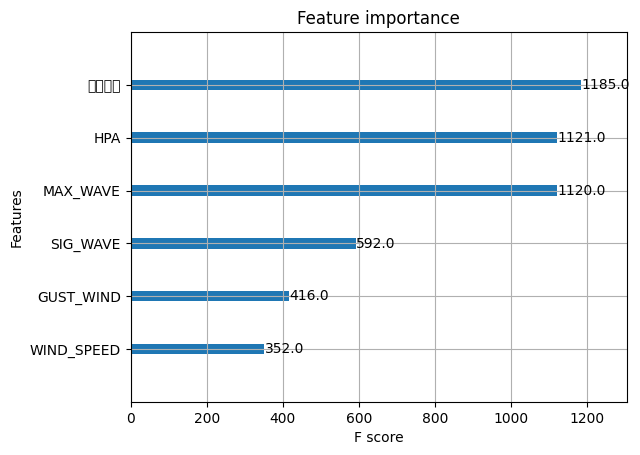

In [15]:
# 중요도 plot
import matplotlib.pyplot as plt
plot_importance(model)
plt.yticks(range(6), X)
plt.show()

In [16]:
predictions = model.predict(x_test)
predictions

array([ 1.17028885e+01, -7.97716454e-02,  8.44365638e-03, ...,
       -1.27286762e-01, -4.57076393e-02,  5.34207653e-03], dtype=float32)

In [17]:
test_df = pd.DataFrame(predictions)

In [18]:
test_df.describe()

,0
count,14530.000000
mean,1.416414
std,5.782852
min,-6.471278
25%,-0.002974
50%,0.001408
75%,0.008444
max,86.375824


In [19]:
y_pred = model.predict(x_test)
y_true = y_test

* 성능

In [20]:
# MAE
mae = mean_absolute_error(y_true, y_pred)
print('MAE:{0: .2f}'.format(mae))

MAE: 0.48


In [21]:
# MSE
mse = mean_squared_error(y_true, y_pred)
print('MSE:{0: .2f}'.format(mse))

MSE: 4.63


* 예측 그래프

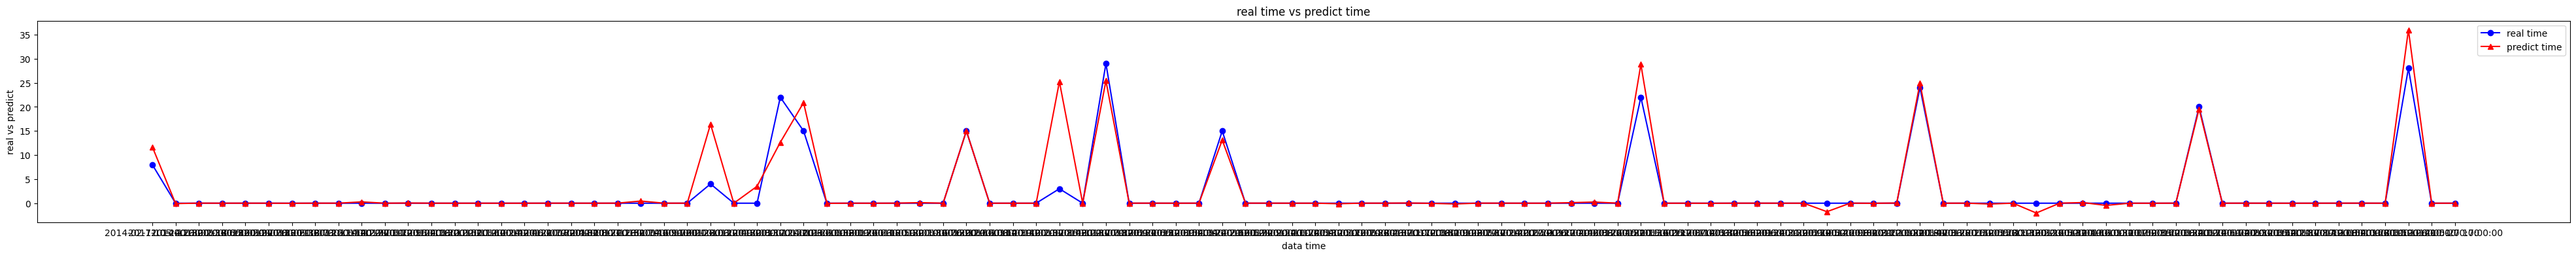

In [22]:
fig = plt.figure( figsize = (50, 4) )
chart = fig.add_subplot(1,1,1)
chart.plot(y_true[:100], marker='o', color='blue', label='real time')
chart.plot(y_pred[:100], marker='^', color='red', label='predict time')
chart.set_title('real time vs predict time')
plt.xlabel('data time')
plt.ylabel('real vs predict')
plt.legend(loc = 'best') 

* 모델 저장하기

In [23]:
joblib.dump(model, 'XGBoost_minmax_model02.pkl')

['XGBoost_minmax_model02.pkl']

* RMSE 확인하기

In [24]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [26]:
dtrain = xgb.DMatrix(data=x_train, label = y_train)
dtest = xgb.DMatrix(data=x_test, label=y_test)

In [29]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = 0.3, max_depth = 6, alpha = 10, n_estimators = 100)

In [30]:
xg_reg.fit(x_train,y_train)

[19:47:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', ...)

In [31]:
preds = xg_reg.predict(x_test)

In [32]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

#  RMSE가 낮으면 더 좋은 모델임

RMSE: 2.121652
